# Paraview Jour 2
## Retour sur les information de hier
Dans la session d'hier, nous avons explorés la connexion à un serveur distant pour utiliser Paraview en mode client-serveur. Nous avons utilisé JupyterHub pour faciliter les choses, mais nous aurions pu nous connecter directement à un serveur de Calcul Canada. Dans le cas où vous voudriez directement vous connecter sur un serveur, voici ce que vous devriez faire (prenez note que vous allez avoir besoin de deux fenêtres de terminal ou bien tmux https://github.com/tmux/tmux):

1. Ouvrez un terminal (ou MobaXterm)
2. Connectez vous par ssh en utilisant votre nom d'utilisateur à Calcul Canada sur Béluga, Graham, ou Cedar. Vous devrez taper votre mot de passe. Attention, vous ne verrez rien apparaître!

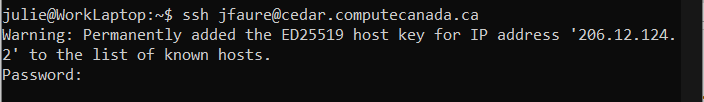


In [ ]:
ssh username@machine.calculcanada.ca

Nous vous demandons maintenant d'utiliser une clé SSH pour vous connecter. La marche à suivre est indiquée ici: https://docs.computecanada.ca/wiki/SSH_Keys/fr Voici le résultat lorsque vous utilisez une clé SSH.

![sshkey.png](attachment:sshkey.png)

Une fois connecté, vous pouvez démarrer une session interactive sous le compte de votre superviseur.

In [ ]:
salloc --time=3:00:0 --ntasks=16 --mem-per-cpu=4000 --account=def-votresuperviseur

et vous déplacer à l'emplacement de vos données.

In [ ]:
cd chemin/vers/vos/donnees

vous avez ensuite 2 options pour démarrer Paraview selon vos besoins:

In [ ]:
mpirun -np 16 pvserver # si vous avez besoin de mpi

# ou

srun pvserver

Après quelques temps, ce message devrait s'afficher:

In [ ]:
Waiting for client...
Connection URL: cs://machine1234.int.machine.computecanada.ca:11111 # machine = beluga, cedar ou graham
Accepting connection(s):
machine1234.int.machine.computecanada.ca:11111

Paraview vous indique qu'il est prêt à recevoir une connexion. Maintenant, dans un *deuxième* terminal, vous devez créer un tunnel SSH (c'est la première partie à copier dans l'interface JupyterHub):

In [ ]:
ssh username@machine.computecanada.ca -L 11111:machine1234:11111

Ensuite, sur votre ordinateur, vous procédez comme à l'habitude en ouvrant une connexion avec le port 1111. 

## Données d'aujourd'hui

Aujourd'hui, nous allons reprendre la méthode JupyterHub pour nous connecter. Nous allons commencer par un jeu de données médicales avec un scan de torse humain.




### Données de Lac
Nous allons utiliser des données de Lac et de terrain

Tout d'abord, nous allons charger les données du Lac:
1. Charger le fichier lac_full_volume.csv + Apply
2. Appliquer le filtre: table to points (set x,y,z)
3. Fermer la table et ouvrir l'oeil de TableToPoints1

L'image apparaît en blanc puisque nous n'avons rien sélectioné.

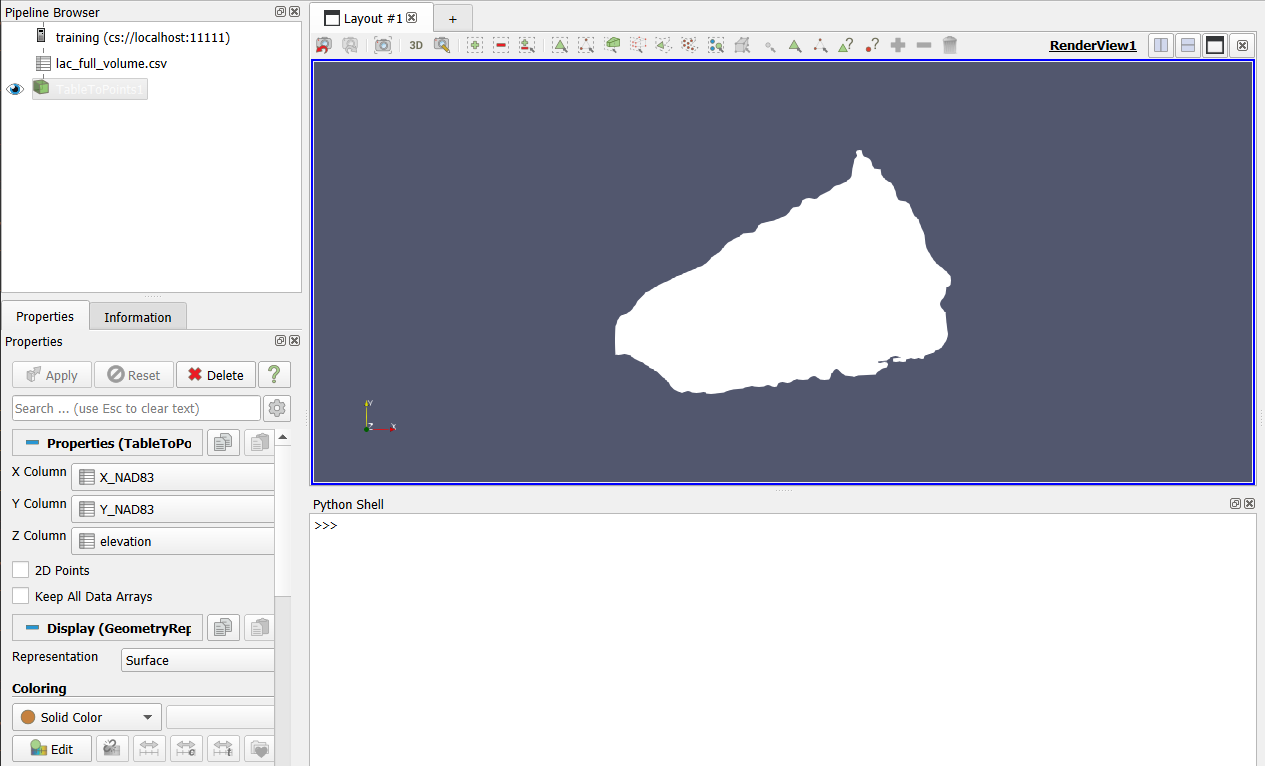

Nous allons donc choisir une couleur pour la profondeur: 
4. Color: bathy
5. Dans Edit: presets- black, blue, white (ne JAMAIS prendre Rainbow)
6. Ajustez le gradient

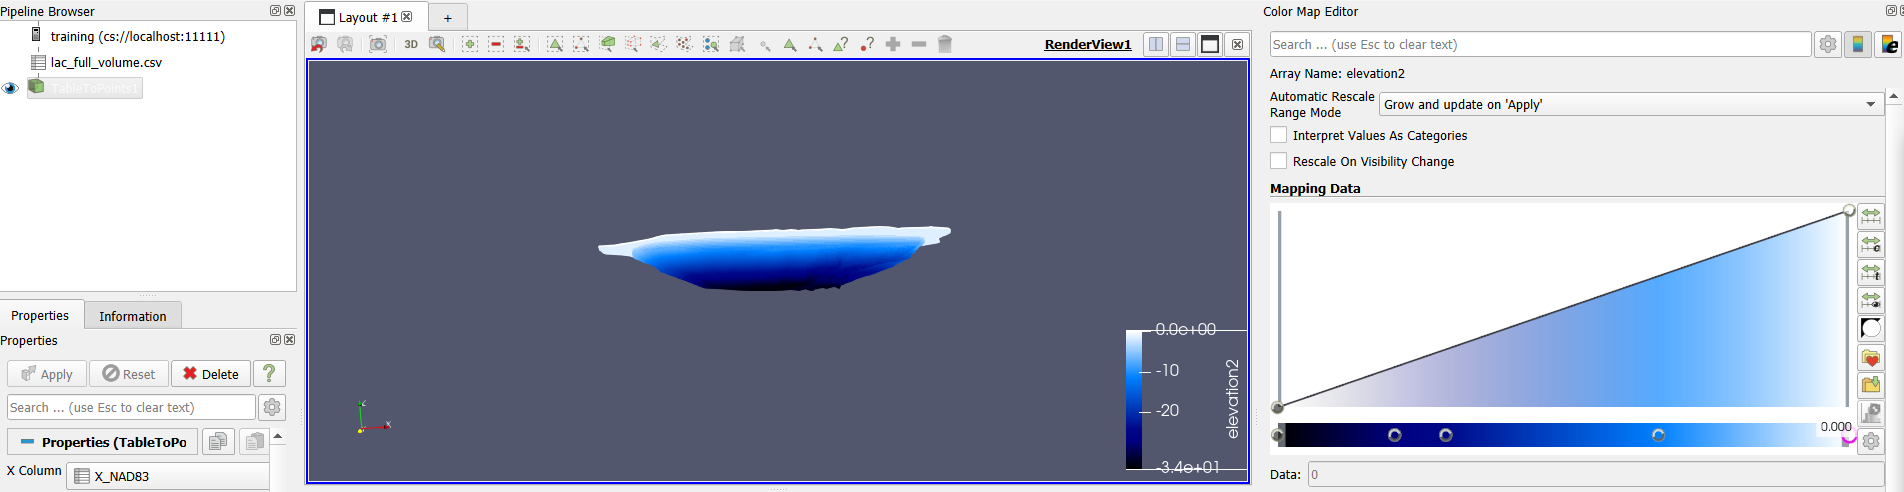

Nous devons maintenant ajouter le terrain existant autour du lac. Le jeu de données provient de données Lidar traitées.

1. Charger le fichier Lac_terrain.csv + Apply
2. Appliquer le filtre: table to points (set x = x_coord,y = y_coord,z = hauteur)
3. Fermer la table et ouvrir l'oeil de TableToPoints1
4. Color: ombre
5. Edit: presets - linear green + invert color

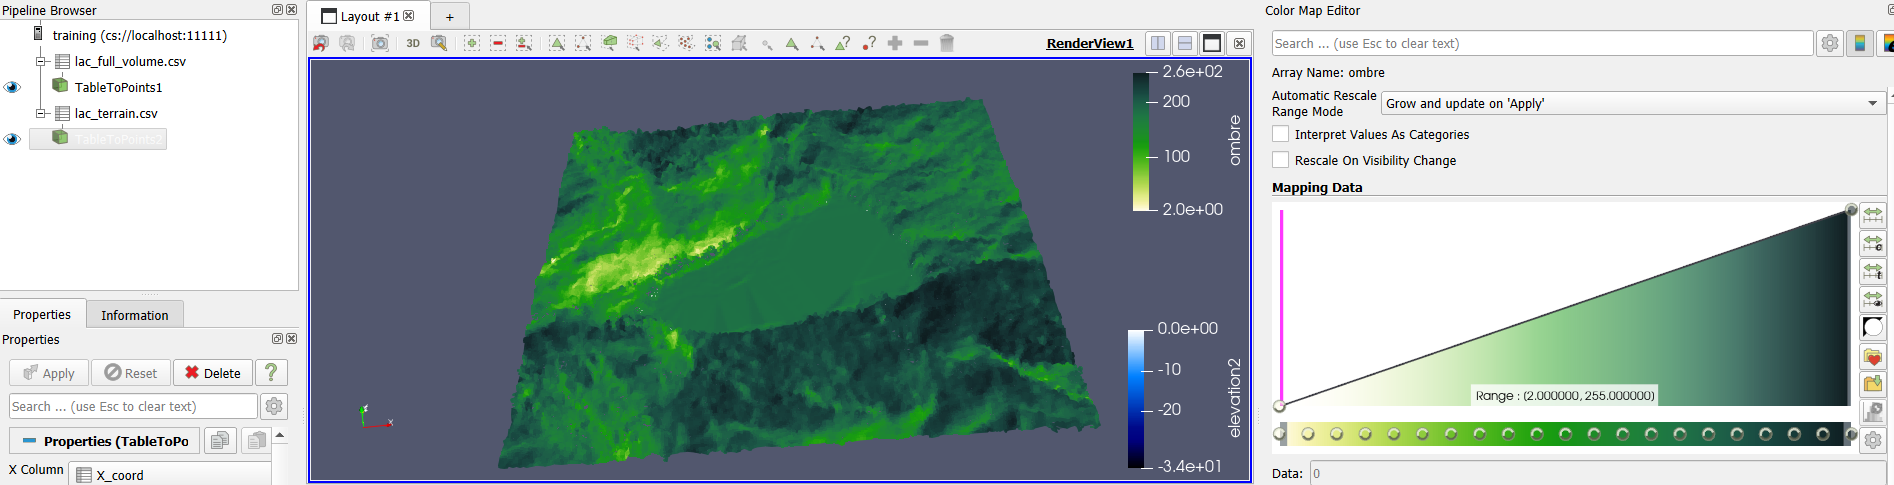

Maintenant, vous constatez que l'eau est légèrement sous le niveau du sol, bien que le maximum de l'eau soit techiquement le même que le minimum du sol. C'est que le lac se trouve légèrement en altitude et cette information n'est pas incluse dans la mesure prise par le sonar. Il faut donc élever ou descendre l'un des jeux de données pour le faire coincider avec l'autre. Nous allons descendre le terrain:

1. Dans les propriétés: Advanced - transforming - translation (ou chercher Transforming)
2. Changer la valeur Z = -4

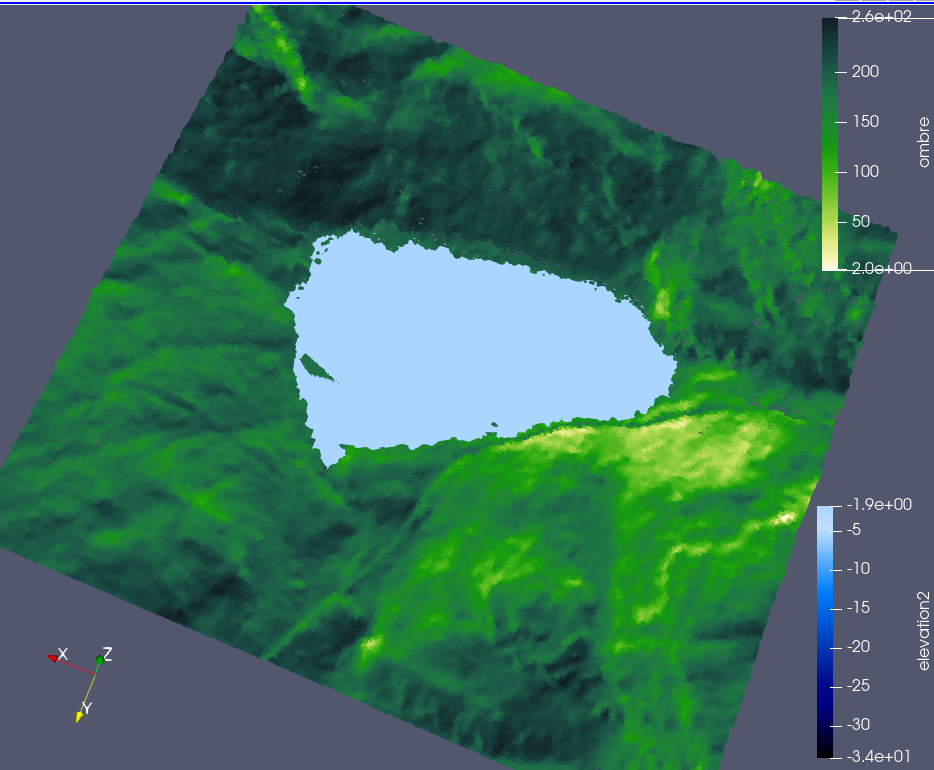

Pour faire un vidéo
1. Animation: orbit + "+"
2. Double-click camera + camera position
3. Ajuster les points dans l'image
4. Cliquer + pour ajouter des points si nécessaire
5. Mode: real time - duration: 20s

#### Exercice
Sauvegardez selon la méthode de votre choix et créez un vidéo avec l'animation

### Données médicales

Naviguez jusqu'à paraview-national/data/thorax/

Sélectionnez la première option.

Paraview peut traiter une multitude de formats de fichiers. Cependant, il est possible que plusieurs options soient disponible pour un même format de fichier. Dans ce cas, Paraview propose les différentes options qui s'offrent à nous. Nous devons choisir Directory dans le cas actuel.

Faites le rendu avec Rendering Dicomimage
1. Surface
2. Volume
Coloring - edit - presets - yellow - gray
Invert


### Données de turbines

nous allons ouvrir un jeu de données de turbines non structuré et déjà disponible sur le serveur. Son emplacement est dans datasetjour2.

Choisissez m114f105_AL_2d_tsr_5_*.vtu et Apply

![datasetjour2.PNG](attachment:datasetjour2.PNG)